<a href="https://colab.research.google.com/github/WahyuNabila/google-colab/blob/main/clustering_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Memuat data train
url_train ='/content/titanic-train.csv'
train_data = pd.read_csv(url_train)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Memuat data test
url_test = "/content/titanic-test.csv"
titanic_test = pd.read_csv(url_test)
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **cleaning data train dan data test**

In [ ]:
# Mengisi nilai yang hilang di kolom 'Age' pada data latih dengan median
train_data['Age'].fillna(train_data['Age'].median (), inplace=True)

# Mengisi nilai yang hilang di kolom 'Embarked' pada data latih dengan modus
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Menggunakan one-hot encoding untuk mengubah kolom kategorikal 'Sex' dan 'Embarked' menjadi variabel biner
train_data = pd.get_dummies (train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Memilih fitur (X_train) dan target (y_train) dari data latih
X_train = train_data[[ 'Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y_train = train_data['Survived']

In [ ]:
# Mengisi nilai yang hilang di kolom 'Age' dan 'Fare' pada data uji dengan median
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test['Fare'].fillna(titanic_test[ 'Fare'].median(), inplace=True)

# Mengisi nilai yang hilang di kolom 'Embarked' pada data uji dengan modus
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace=True)

# Menggunakan one-hot encoding untuk mengubah kolom kategorikal 'Sex' dan 'Embarked' pada data uji
titanic_test = pd.get_dummies (titanic_test, columns=['Sex', 'Embarked'], drop_first=True)

# Memilih fitur (X_test) dari data uji
X_test = titanic_test[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

In [ ]:
# Inisialisasi model
knn = KNeighborsClassifier (n_neighbors=5)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Latih model
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluasi model
knn_pred = knn.predict(X_train)
dt_pred = dt.predict(X_train)
rf_pred = rf.predict(X_train)
xgb_pred = xgb.predict(X_train)

knn_accuracy = accuracy_score (y_train, knn_pred)
dt_accuracy = accuracy_score (y_train, dt_pred)
rf_accuracy = accuracy_score (y_train, rf_pred)
xgb_accuracy = accuracy_score (y_train, xgb_pred)

knn_precision = precision_score(y_train, knn_pred)
knn_recall = recall_score (y_train, knn_pred)

dt_precision = precision_score(y_train, dt_pred)
dt_recall = recall_score (y_train, dt_pred)

rf_precision = precision_score (y_train, rf_pred)
rf_recall = recall_score (y_train, rf_pred)

xgb_precision = precision_score (y_train, xgb_pred)
xgb_recall = recall_score (y_train, xgb_pred)

print(f'K-NN Accuracy: {knn_accuracy}')
print(f'K-NN Precision: {knn_precision}')
print(f'K-NN Recall: {knn_recall}\n')

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree Precision: {dt_precision}')
print(f'Decision Tree Recall: {dt_recall}\n')

print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest Precision: {rf_precision}')
print(f'Random Forest Recall: {rf_recall}\n')

print(f'XGBoost Accuracy: {xgb_accuracy}')
print(f'XGBoost Precision: {xgb_precision}')
print(f'XGBoost Recall: {xgb_recall}')

K-NN Accuracy: 0.8013468013468014
K-NN Precision: 0.7777777777777778
K-NN Recall: 0.6754385964912281

Decision Tree Accuracy: 0.9797979797979798
Decision Tree Precision: 0.9939024390243902
Decision Tree Recall: 0.9532163742690059

Random Forest Accuracy: 0.9797979797979798
Random Forest Precision: 0.9879518072289156
Random Forest Recall: 0.9590643274853801

XGBoost Accuracy: 0.9640852974186308
XGBoost Precision: 0.9725609756097561
XGBoost Recall: 0.9327485380116959


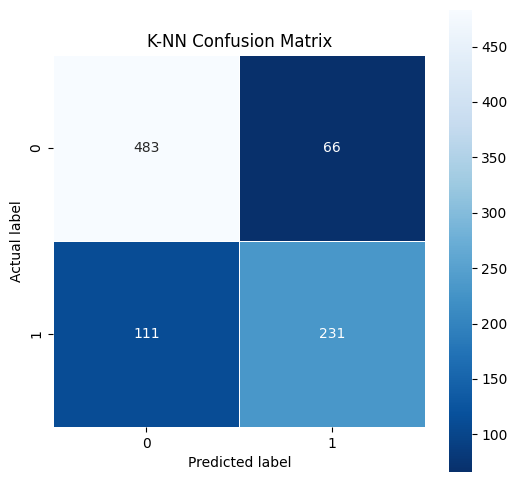

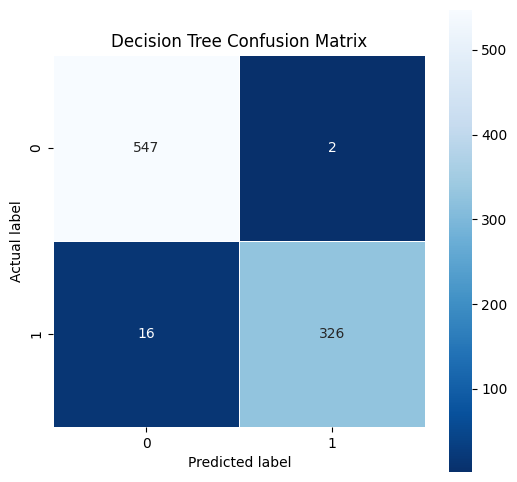

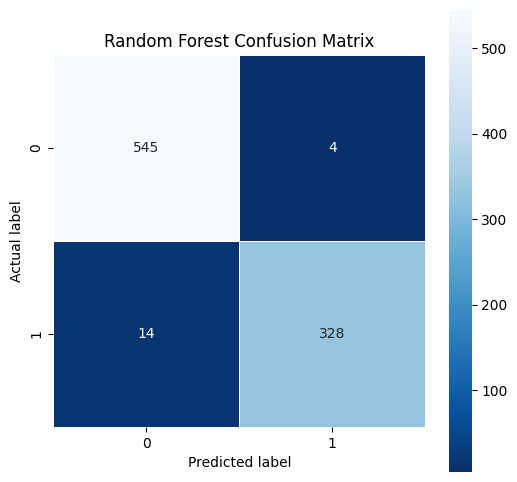

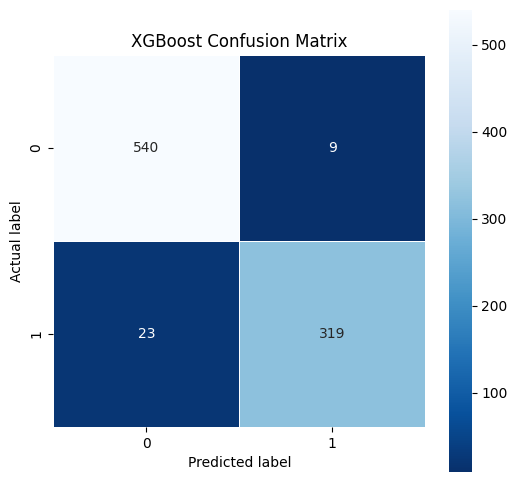

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6,6))
  sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title(title)

# Memanggil fungsi plot_confusion matrix untuk masing-masing model
plot_confusion_matrix(y_train, knn_pred, "K-NN Confusion Matrix")
plt.show()

plot_confusion_matrix(y_train, dt_pred, "Decision Tree Confusion Matrix")
plt.show()

plot_confusion_matrix(y_train, rf_pred, "Random Forest Confusion Matrix")
plt.show()

plot_confusion_matrix(y_train, xgb_pred, "XGBoost Confusion Matrix")
plt.show()

# **variabel yang berpengaruh**

Pclass (Kelas Penumpang): Variabel ini menunjukkan kelas sosial ekonomi penumpang (1, 2, atau 3). Biasanya, penumpang kelas atas (Pclass=1) memiliki lebih banyak peluang untuk bertahan hidup karena mereka mungkin mendapatkan prioritas dalam evakuasi.

Sex (Jenis Kelamin): Jenis kelamin penumpang (pria atau wanita) dapat berpengaruh signifikan.

Age (Usia): Usia penumpang dapat mempengaruhi karena anak-anak dan lansia mungkin mendapatkan prioritas dalam evakuasi atau mungkin lebih rentan terhadap situasi darurat.

SibSp (Jumlah Saudara/Kepala Keluarga di Kapal): Variabel ini mencerminkan jumlah saudara atau pasangan penumpang di kapal. Ini bisa mempengaruhi karena penumpang dengan lebih banyak anggota keluarga mungkin berusaha untuk tetap bersama dalam situasi darurat.

Parch (Jumlah Orang Tua/Anak di Kapal): Mirip dengan 'SibSp', variabel ini mencerminkan jumlah orang tua atau anak yang ada di kapal bersama penumpang. Hal ini juga bisa mempengaruhi karena keluarga mungkin berusaha untuk tetap bersama.

Fare (Biaya Tiket): Harga tiket yang dibayarkan oleh penumpang dapat mencerminkan kelas penumpang atau lokasi tempat duduk di kapal. Ini juga bisa mempengaruhi kelangsungan hidup.

Embarked (Pelabuhan Keberangkatan): Pelabuhan tempat penumpang naik ke kapal (C = Cherbourg, Q = Queenstown, S = Southampton) bisa mencerminkan beberapa faktor seperti lokasi awal perjalanan. Ini mungkin mempengaruhi distribusi penumpang di kapal.

# **penjelasan**
Jika ingin memprioritaskan akurasi tinggi, maka model Decision Tree dan Random Forest mungkin merupakan pilihan yang baik, karena keduanya memiliki akurasi sekitar 97.98%.

Namun, jika lebih peduli dengan kemampuan model untuk mengidentifikasi sebagian besar instance positif yang sebenarnya (recall yang tinggi), maka model Random Forest memiliki recall sekitar 95.91%, yang lebih tinggi dibandingkan dengan model lain.